<a href="https://colab.research.google.com/github/marquito3012/TFG/blob/main/FineTuningActionClassificatorYolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow

# Import YOLO library
from ultralytics import YOLO

# Import Roboflow
from roboflow import Roboflow

# Import OS
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [2]:
HOME = os.getcwd()
print(HOME)
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Download the dataset
rf = Roboflow(api_key="9KG8ovuhVxeymK6aMBor")
project = rf.workspace("uni-mallw").project("drowsy-detection-qnv9b")
version = project.version(3)
dataset = version.download("yolov11")

dataset_path = dataset.location  # Asegúrate de que esta variable tiene el path correcto

# Lista archivos dentro del dataset
print("Contenido del dataset:", os.listdir(dataset_path))

import shutil
import yaml

dataset_path = dataset.location  # Asegúrate de que esta variable contiene la ruta correcta
output_path = f"{HOME}/datasets/classification_dataset"

# Cargar data.yaml para obtener los nombres de las clases
with open(os.path.join(dataset_path, "data.yaml"), "r") as f:
    data = yaml.safe_load(f)
class_names = data["names"]

# Procesar train y valid
for split in ["train", "valid"]:
    split_path = os.path.join(dataset_path, split)
    images_path = os.path.join(split_path, "images")
    labels_path = os.path.join(split_path, "labels")

    # Crear carpeta de salida para clasificación
    if split == "valid":
      split_output_path = os.path.join(output_path, "val")
    else:
      split_output_path = os.path.join(output_path, split)
    os.makedirs(split_output_path, exist_ok=True)

    # Crear carpetas de clases
    for class_name in class_names:
        os.makedirs(os.path.join(split_output_path, class_name), exist_ok=True)

    # Mover imágenes a sus respectivas carpetas de clase
    for label_file in os.listdir(labels_path):
        img_name = label_file.replace(".txt", ".jpg")  # Ajustar si las imágenes son PNG
        img_path = os.path.join(images_path, img_name)

        with open(os.path.join(labels_path, label_file), "r") as f:
            lines = f.readlines()

        if lines:
            class_id = int(lines[0].split()[0])  # Tomamos la primera clase detectada
            class_name = class_names[class_id]

            # Copiar la imagen a su respectiva carpeta de clase
            shutil.copy(img_path, os.path.join(split_output_path, class_name, img_name))

print("✅ Conversión completada. Nuevo dataset en:", output_path)
%cd {HOME}

/content
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drowsy-Detection-3 in yolov11:: 100%|██████████| 3605/3605 [00:01<00:00, 3140.02it/s]


Contenido del dataset: ['valid', 'data.yaml', 'train', 'README.roboflow.txt', 'README.dataset.txt']
✅ Conversión completada. Nuevo dataset en: /content/datasets/classification_dataset
/content


In [3]:
# Train YOLOv8 on your dataset
model = YOLO("yolo11n-cls.pt")

train_results = model.train(
    data="/content/datasets/classification_dataset",  # Dataset path
    epochs=30,  # Adjust based on need
    batch=32,   # Adjust based on GPU
    plots=True
)

100%|██████████| 5.52M/5.52M [00:00<00:00, 82.2MB/s]


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/datasets/classification_dataset, epochs=30, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.6MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/classification_dataset/train... 1256 images, 0 corrupt: 100%|██████████| 1256/1256 [00:00<00:00, 6469.34it/s]


train: New cache created: /content/datasets/classification_dataset/train.cache


val: Scanning /content/datasets/classification_dataset/val... 538 images, 0 corrupt: 100%|██████████| 538/538 [00:00<00:00, 3764.66it/s]

val: New cache created: /content/datasets/classification_dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/30     0.476G     0.7928         32        224:  12%|█▎        | 5/40 [00:01<00:05,  5.91it/s]

       1/30     0.497G     0.7903         32        224:  20%|██        | 8/40 [00:01<00:07,  4.38it/s]
100%|██████████| 755k/755k [00:00<00:00, 20.2MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]

                   all      0.775          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,  2.70it/s]

                   all      0.743          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]

                   all      0.872          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all      0.823          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all      0.887          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]

                   all      0.885          1



      Epoch    GPU_mem       loss  Instances       Size


      10/30     0.426G     0.3061          8        224: 100%|██████████| 40/40 [00:12<00:00,  3.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


      11/30     0.426G     0.2945          8        224: 100%|██████████| 40/40 [00:13<00:00,  3.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.62it/s]

                   all      0.883          1



      Epoch    GPU_mem       loss  Instances       Size


      12/30     0.426G     0.2842          8        224: 100%|██████████| 40/40 [00:12<00:00,  3.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.61it/s]

                   all      0.877          1



      Epoch    GPU_mem       loss  Instances       Size


      13/30     0.426G     0.2724          8        224: 100%|██████████| 40/40 [00:11<00:00,  3.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]

                   all      0.903          1



      Epoch    GPU_mem       loss  Instances       Size


      14/30     0.426G     0.2657          8        224: 100%|██████████| 40/40 [00:11<00:00,  3.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:04<00:00,  2.11it/s]


                   all      0.861          1

      Epoch    GPU_mem       loss  Instances       Size


      15/30     0.426G     0.2804          8        224: 100%|██████████| 40/40 [00:10<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]

                   all      0.903          1



      Epoch    GPU_mem       loss  Instances       Size


      16/30     0.426G     0.2542          8        224: 100%|██████████| 40/40 [00:09<00:00,  4.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]

                   all      0.913          1



      Epoch    GPU_mem       loss  Instances       Size


      17/30     0.426G     0.2464          8        224: 100%|██████████| 40/40 [00:10<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,  2.71it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


      18/30     0.426G     0.2451          8        224: 100%|██████████| 40/40 [00:11<00:00,  3.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]

                   all      0.914          1



      Epoch    GPU_mem       loss  Instances       Size


      19/30     0.426G     0.2322          8        224: 100%|██████████| 40/40 [00:12<00:00,  3.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]

                   all      0.911          1



      Epoch    GPU_mem       loss  Instances       Size


      20/30     0.426G     0.2263          8        224: 100%|██████████| 40/40 [00:13<00:00,  3.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  4.17it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


      21/30     0.426G     0.2215          8        224: 100%|██████████| 40/40 [00:13<00:00,  2.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  4.19it/s]

                   all      0.918          1



      Epoch    GPU_mem       loss  Instances       Size


      22/30     0.426G     0.2099          8        224: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  4.22it/s]

                   all      0.916          1



      Epoch    GPU_mem       loss  Instances       Size


      23/30     0.426G     0.2147          8        224: 100%|██████████| 40/40 [00:12<00:00,  3.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


      24/30     0.426G      0.203          8        224: 100%|██████████| 40/40 [00:11<00:00,  3.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]

                   all      0.924          1



      Epoch    GPU_mem       loss  Instances       Size


      25/30     0.426G     0.1893          8        224: 100%|██████████| 40/40 [00:15<00:00,  2.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]

                   all      0.924          1



      Epoch    GPU_mem       loss  Instances       Size


      26/30     0.426G     0.1836          8        224: 100%|██████████| 40/40 [00:10<00:00,  3.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]

                   all      0.931          1



      Epoch    GPU_mem       loss  Instances       Size


      27/30     0.426G     0.1605          8        224: 100%|██████████| 40/40 [00:09<00:00,  4.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,  2.43it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


      28/30     0.426G      0.179          8        224: 100%|██████████| 40/40 [00:10<00:00,  3.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.28it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


      29/30     0.426G     0.1812          8        224: 100%|██████████| 40/40 [00:11<00:00,  3.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]

                   all      0.937          1



      Epoch    GPU_mem       loss  Instances       Size


      30/30     0.426G      0.189          8        224: 100%|██████████| 40/40 [00:12<00:00,  3.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:02<00:00,  4.18it/s]

                   all      0.926          1



30 epochs completed in 0.136 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 112 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
train: /content/datasets/classification_dataset/train... found 1256 images in 2 classes ✅ 
val: /content/datasets/classification_dataset/val... found 538 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]


                   all      0.939          1
Speed: 0.2ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


/content


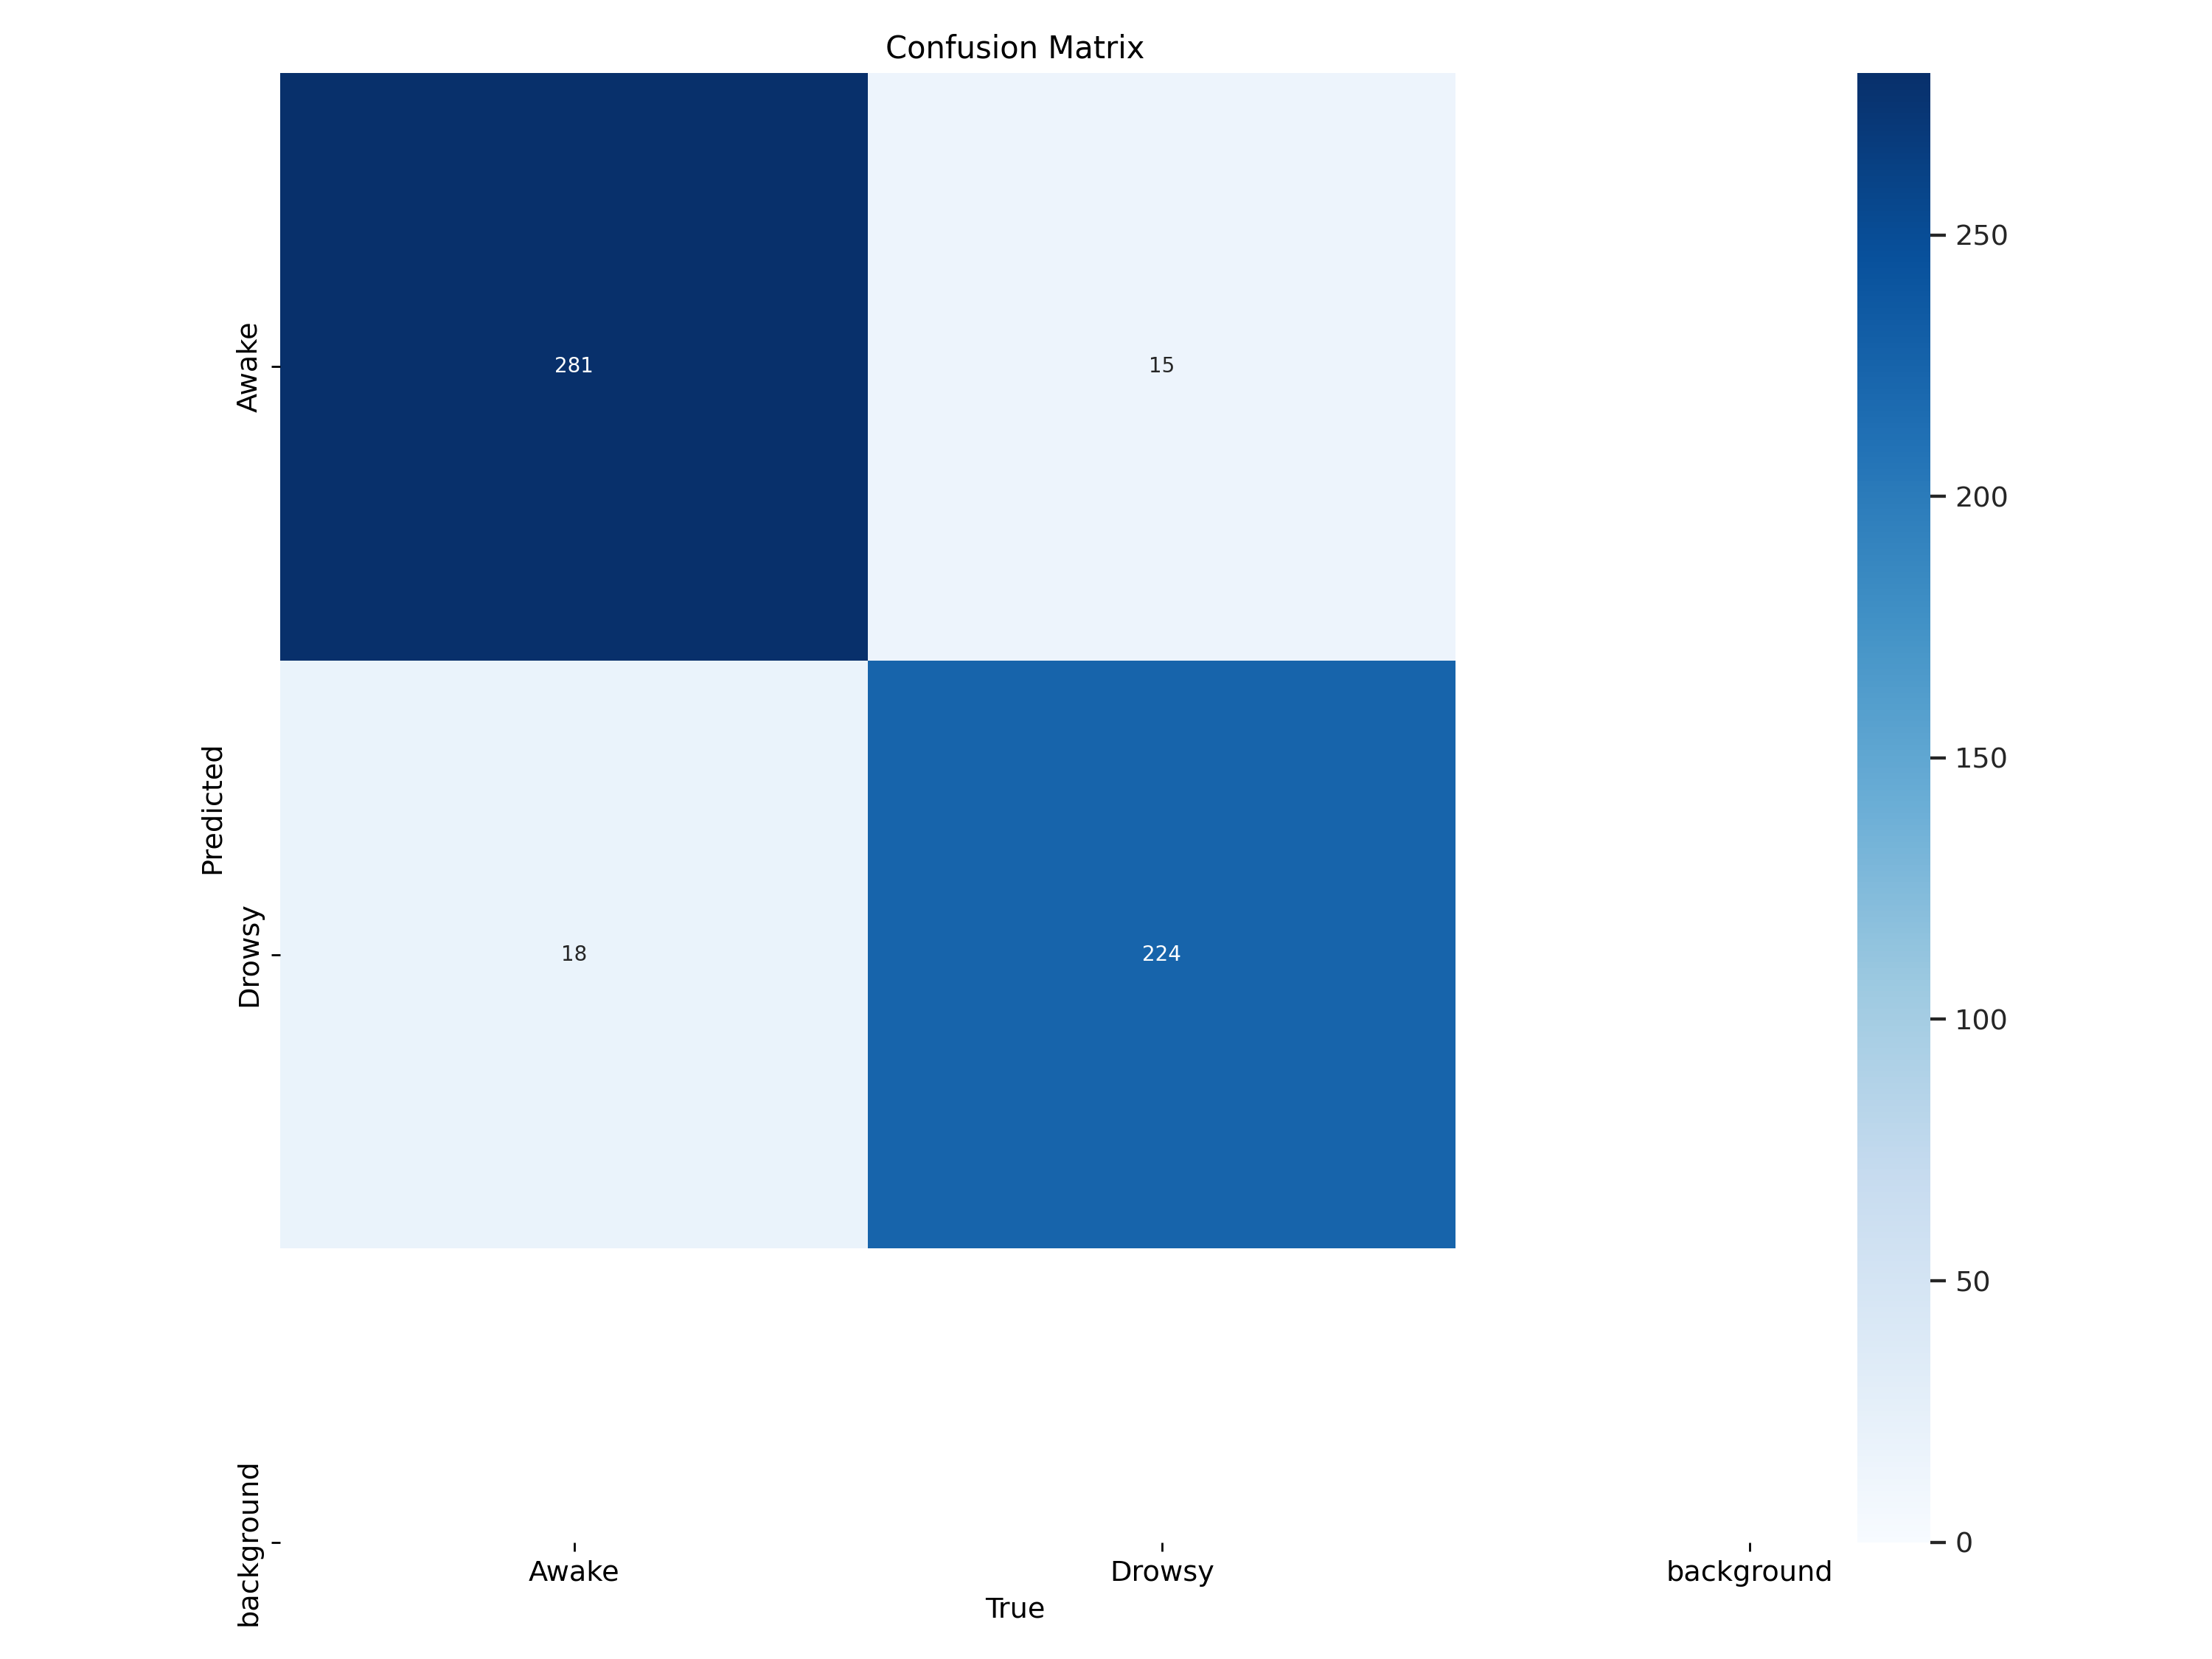

In [4]:
from IPython.display import Image, display
%cd {HOME}
Image(filename=f"{HOME}/runs/classify/train/confusion_matrix.png", width=600)

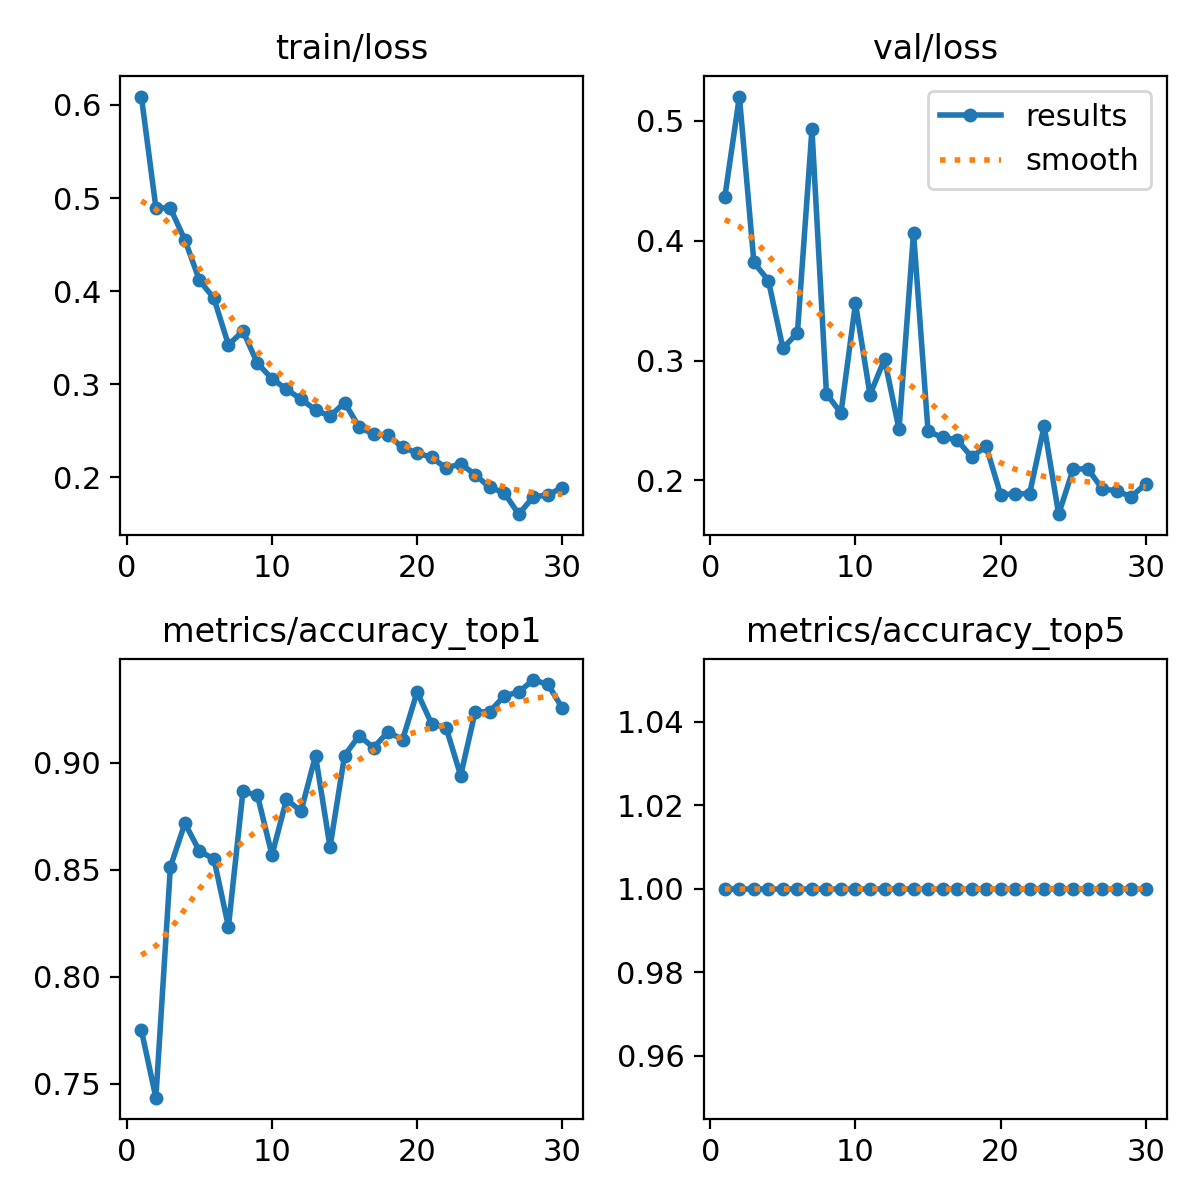

In [5]:
Image(filename=f"{HOME}/runs/classify/train/results.png", width=600)